# File: Key words extraction.ipynb
# Purpose: To extract key words from ITMO University data set
# Programmer: VG6
# Date: 15.03.2020

## Settting up

In [32]:
import pandas as pd
import re
from nltk.tokenize import sent_tokenize
import pymorphy2
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from EDA_Functions import get_all_words_list, plot_word_cloud, get_top_n_grams, preprocess_data, sort_coo, extract_topn_from_vector
#from EDA_Functions import read_glove
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import coo_matrix
from tqdm import tqdm_notebook

## Loading data

In [33]:
itmo_data = pd.read_csv('Data/all_matched.csv', index_col=0)

In [34]:
itmo_data.head()

,SUBFIELDCODE,SUBFIELDNAME,DEGREE,SUBJECT,SEMESTER,START_YEAR,URL,Название курса,Содержание курса,Дата сет,Ключевые слова
0,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Математика,1,2014,https://www.hse.ru/edu/courses/292700221,Математика,Элементы линейной алгебрыТема 1.1. линейные пр...,hse,
1,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Математика,2,2014,https://www.hse.ru/edu/courses/292700221,Математика,Элементы линейной алгебрыТема 1.1. линейные пр...,hse,
2,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Физика,1,2014,https://www.hse.ru/edu/courses/292684119,Физика,Тема 1. Механика. Механические колебания и вол...,hse,
3,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Физика,2,2014,https://www.hse.ru/edu/courses/292684119,Физика,Тема 1. Механика. Механические колебания и вол...,hse,
4,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Основы права,1,2014,https://online.edu.ru/public/course.xhtml?face...,Основы права,Что такое право? Российское право на правовой...,itmo,


## Cleaning data

In [9]:
# getting stop words from nltk package 
ru_stop_words = stopwords.words('russian')
en_stop_words = stopwords.words('english')

# getting handed stop words list
handed_stop_words = ['час', 'часы', 'основной', 'умение', 'предметный', 'выбрать', 'семинар', 'самостоятельный',
                    'работа', 'ориентировать', 'профессионально', 'умение', 'основной', 'лекция', 'тема', 'студент', 'современный',
                    'навык', 'модуль', 'формула', 'that', 'метод', 'решение', 'раздел', 'один', 'два', 'that', 'неделя',
                    'work']

all_stop_words = ru_stop_words + en_stop_words + handed_stop_words

In [10]:
itmo_data['Чистое содержание'] = preprocess_data(itmo_data['Содержание курса'], all_stop_words)

In [11]:
morph = pymorphy2.MorphAnalyzer()
itmo_data['Чистое содержание'] = itmo_data['Чистое содержание'].apply(lambda x: ' '.join([morph.parse(word)[0].normal_form for word in x.split()]))

KeyboardInterrupt: 

In [16]:
itmo_data = pd.read_csv('Data/new_itmo.csv')

In [33]:
itmo_data.head()

,SUBFIELDCODE,SUBFIELDNAME,DEGREE,SUBJECT,SEMESTER,START_YEAR,URL,Название курса,Содержание курса,Дата сет,Ключевые слова,Чистое содержание
0,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Математика,1,2014,https://www.hse.ru/edu/courses/292700221,Математика,Элементы линейной алгебрыТема 1.1. линейные пр...,hse,,элемент линейный алгебрытема линейный простран...
1,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Математика,2,2014,https://www.hse.ru/edu/courses/292700221,Математика,Элементы линейной алгебрыТема 1.1. линейные пр...,hse,,элемент линейный алгебрытема линейный простран...
2,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Физика,1,2014,https://www.hse.ru/edu/courses/292684119,Физика,Тема 1. Механика. Механические колебания и вол...,hse,,механик механический колебание волныкинематика...
3,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Физика,2,2014,https://www.hse.ru/edu/courses/292684119,Физика,Тема 1. Механика. Механические колебания и вол...,hse,,механик механический колебание волныкинематика...
4,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Основы права,1,2014,https://online.edu.ru/public/course.xhtml?face...,Основы права,Что такое право? Российское право на правовой...,itmo,,такой право российский право правовой карта ми...


## Performing a little bit of EDA

In [55]:
# getting unigrams
unigrams = get_top_n_grams(itmo_data['Чистое содержание'])

In [56]:
# getting bigrams
bigrams = get_top_n_grams(itmo_data['Чистое содержание'], n_grams=2)

In [57]:
# getting words 
unigram_words = [word[0] for word in unigrams]
bigram_words = [words[0] for words in bigrams]

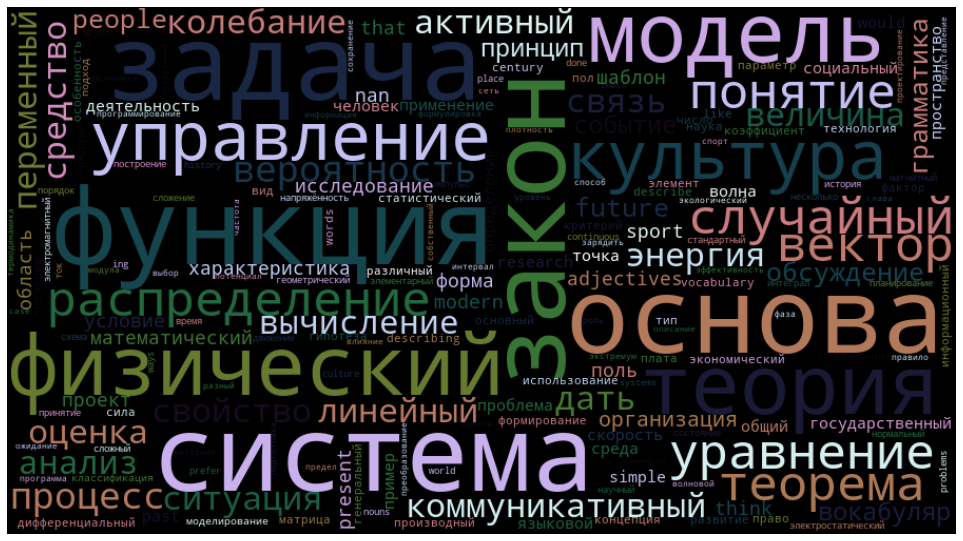

In [58]:
# plotting word cloud for unigrams
plot_word_cloud(unigram_words)

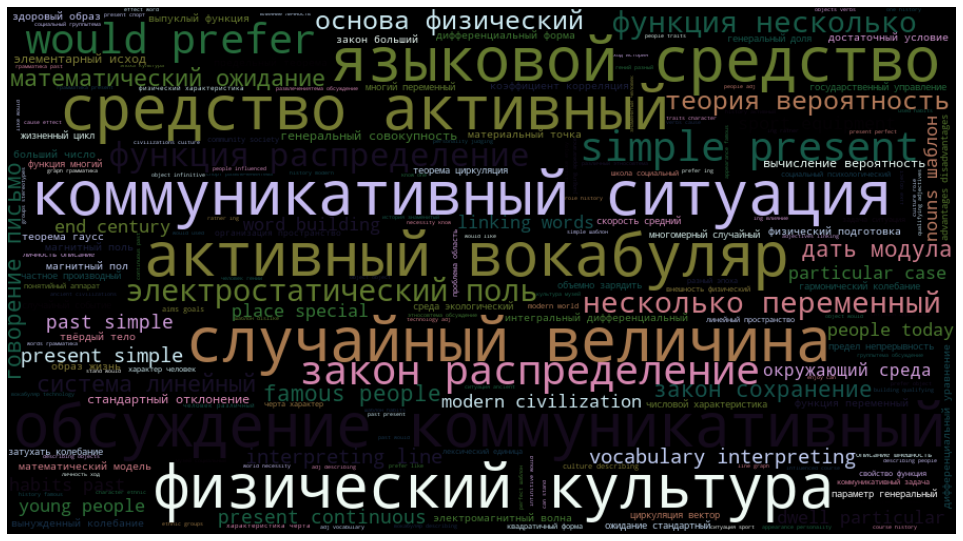

In [59]:
# plotting word cloud for bigrams
plot_word_cloud(bigram_words)

## Implementing TF-IDF

In [35]:
# creating Count vectorizer instance
vectorizer = CountVectorizer(max_df=0.8, max_features=10000, ngram_range=(1, 3))

# getting bag of words
bow = vectorizer.fit_transform(itmo_data['Чистое содержание'])

In [36]:
# getting vocabulary
list(vectorizer.vocabulary_.keys())[:10]

['элемент',
 'линейный',
 'алгебрытема',
 'пространство',
 'лекция',
 'семинар',
 'час',
 'самостоятельный',
 'часы',
 'определение']

In [37]:
# creating TF-IDF transformer instance
tf_idf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)

# fit bag of words from previous stem
tf_idf_transformer.fit(bow)

# getting feature names
feature_names = vectorizer.get_feature_names()

In [38]:
# initializing list for TF-IDF key words
key_words_tf_idf = []

# getting key words for each course
for doc in itmo_data['Чистое содержание'].values:
    # transforming doc vector to TF-IDF
    tf_idf_vector = tf_idf_transformer.transform(vectorizer.transform([doc]))
    
    # sorting sparse matrix
    sorted_items = sort_coo(tf_idf_vector.tocoo())

    # extracting to 15 keywords
    keywords = extract_topn_from_vector(feature_names, sorted_items, 15)
    
    # filling key words list
    key_words_tf_idf.append(keywords)

In [39]:
# creating new column in itmo data with TF-IDF keywords
itmo_data['keywords_tf-idf'] = key_words_tf_idf

In [40]:
itmo_data.to_csv('Data/Itmo_with_tf_idf.csv')

## Implementing TextRank

In [23]:
itmo_data = itmo_data.fillna(' ')

In [24]:
# getting sentences
sentences = []

for sent in itmo_data['Чистое содержание']:
    sentences.extend(sent_tokenize(sent))


In [25]:
import numpy as np

def read_glove(filename):
    word_embeddings = {}
    f = open(filename,'r', errors = 'ignore', encoding='utf8')
    
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        word_embeddings[word] = coefs
        
    f.close()
    
    return word_embeddings

def read_eng_glove(filename):
    embedding_model = {}
    f = open(filename, encoding="utf8")
    for line in f:
        values = line.split()
        word = ''.join(values[:-300])
        coefs = np.asarray(values[-300:], dtype='float32')
        embedding_model[word] = coefs
    f.close()
    return embedding_model

In [26]:
# getting russian word embeddings
ru_word_embeddings = read_glove('multilingual_embeddings.ru')

In [27]:
# getting english word embeddings
en_word_embeddings = read_eng_glove('glove.840B.300d.txt')

In [28]:
# getting sentences vectors
sentence_vectors = []

for sent in tqdm_notebook(sentences):
    if len(sent) != 0:
        vec = sum([en_word_embeddings.get(w, np.zeros((300,))) if re.search(r'[a-zA-Z]+', w) else ru_word_embeddings.get(w, np.zeros((300,))) for w in sent.split()]) / (len(sent.split()) + 0.001)
    else:
        vec = np.zeros((300,))
        
    sentence_vectors.append(vec)

IndentationError: unexpected indent (<ipython-input-28-d921aa803a59>, line 14)

In [46]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

In [4]:
from multiprocessing import Pool

In [47]:
# initalizing matrix with cosine similarity scores
for i in tqdm_notebook(range(len(sentences))):   
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1, 300), 
                                              sentence_vectors[j].reshape(1, 300))[0, 0]

<ipython-input-47-4282fbd87871>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(sentences))):


In [ ]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [14]:
p = Pool(4)

In [15]:
p.map?

In [2]:
import networkx as nx

In [ ]:
# initalizing matrix with cosine similarity scores
for i in tqdm_notebook(range(len(sentences))):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1, 300), 
                                              sentence_vectors[j].reshape(1, 300))[0, 0]